In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #skala menjadi 0-1
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from collections import Counter
from sklearn.metrics import davies_bouldin_score, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use("fivethirtyeight")

In [3]:
data = pd.read_csv("dataset/Dataset-Praktikum.csv")
data.head(5)

,IDPelanggan,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,1,Laki,19,15,39
1,2,Laki,21,15,81
2,3,Perempuan,20,16,6
3,4,Perempuan,23,16,77
4,5,Perempuan,31,17,40


**EDA**

In [4]:
data.drop(columns='IDPelanggan', inplace=True)

data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,Laki,19,15,39
1,Laki,21,15,81
2,Perempuan,20,16,6
3,Perempuan,23,16,77
4,Perempuan,31,17,40


In [5]:
data.shape

(200, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Kelamin                     200 non-null    object
 1   Usia                        200 non-null    int64 
 2   Pendapatan (juta Rp)        200 non-null    int64 
 3   Rating_pengeluaran (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [7]:
data.isnull().sum()

Kelamin                       0
Usia                          0
Pendapatan (juta Rp)          0
Rating_pengeluaran (1-100)    0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Usia,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Pendapatan (juta Rp),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Rating_pengeluaran (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


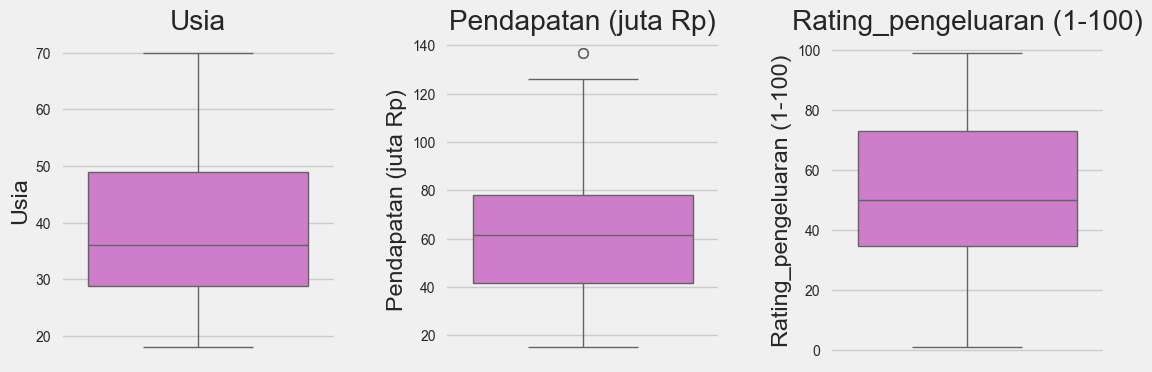

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

def box_plot(data):
  # definisi variabel
  variables = data.select_dtypes(exclude='object').columns

  # membuat figure plot
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))
  fig.subplots_adjust(hspace=0.4, wspace=0.4)

  # iterasi
  for i, var in enumerate(variables):
    sns.boxplot(y=var, data=data, color="orchid", ax=axes[i])
    axes[i].set_title(var)  # tambahkan judul untuk setiap plot

  # tampilkan plot
  plt.show()

# panggil lagi fungsi
box_plot(data)

**PRE-PROCESSING**

In [10]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #konversi ke numerik
data['Kelamin'] = le.fit_transform(data['Kelamin'])
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [11]:
#SCALING DATA
scaler = MinMaxScaler() #inisialisasi

X_scaled = scaler.fit_transform(data) #fit transform
X_scaled

array([[0.        , 0.01923077, 0.        , 0.3877551 ],
       [0.        , 0.05769231, 0.        , 0.81632653],
       [1.        , 0.03846154, 0.00819672, 0.05102041],
       [1.        , 0.09615385, 0.00819672, 0.7755102 ],
       [1.        , 0.25      , 0.01639344, 0.39795918],
       [1.        , 0.07692308, 0.01639344, 0.76530612],
       [1.        , 0.32692308, 0.02459016, 0.05102041],
       [1.        , 0.09615385, 0.02459016, 0.94897959],
       [0.        , 0.88461538, 0.03278689, 0.02040816],
       [1.        , 0.23076923, 0.03278689, 0.7244898 ],
       [0.        , 0.94230769, 0.03278689, 0.13265306],
       [1.        , 0.32692308, 0.03278689, 1.        ],
       [1.        , 0.76923077, 0.04098361, 0.14285714],
       [1.        , 0.11538462, 0.04098361, 0.7755102 ],
       [0.        , 0.36538462, 0.04098361, 0.12244898],
       [0.        , 0.07692308, 0.04098361, 0.79591837],
       [1.        , 0.32692308, 0.04918033, 0.34693878],
       [0.        , 0.03846154,

**MEMBUAT DIAGRAM ELBOW**

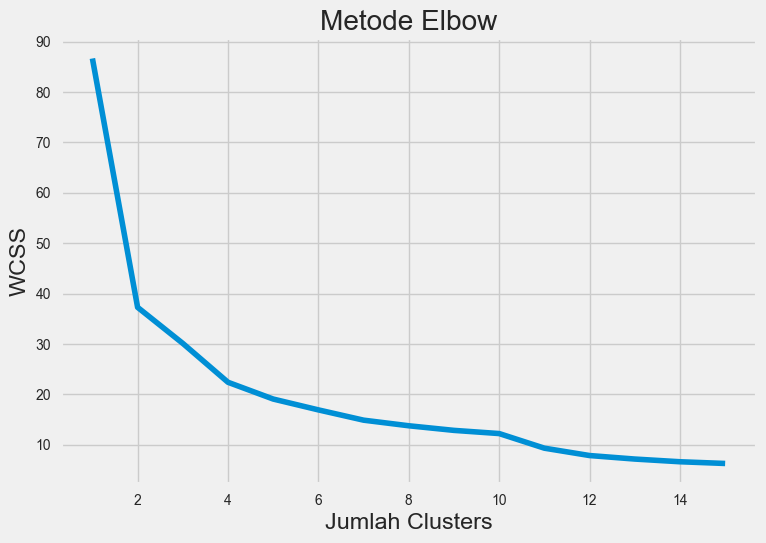

In [12]:
#Menggunakan metode elbow untuk menentukan jumlah klaster yang sesuai
wcss = []
for i in range (1,16):
  kmeans = KMeans (n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_scaled)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,16), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah Clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Menjalankan K-Means clustering ke dataset
model1 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_pred1 = model1.fit_predict(X_scaled)

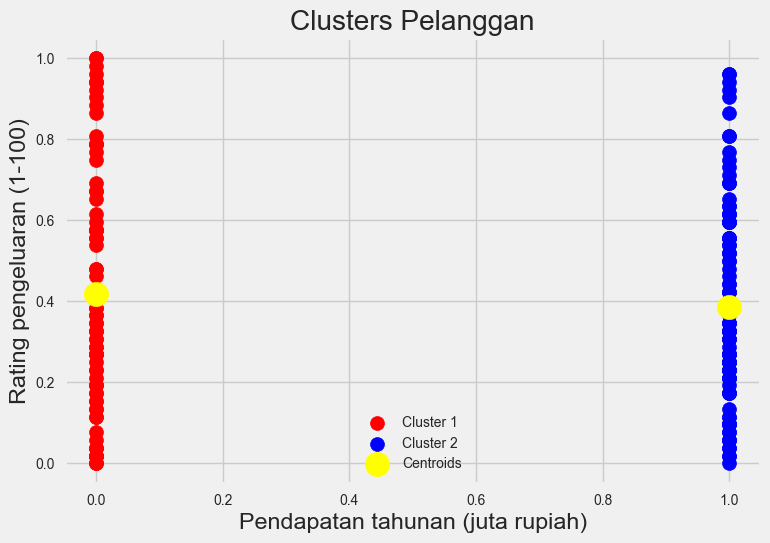

In [14]:
#visualisasi hasil cluster
plt.scatter (X_scaled[y_pred1 == 0,0], X_scaled[y_pred1 == 0,1],
             s = 100, c = 'red', label = 'Cluster 1')

plt.scatter (X_scaled[y_pred1 == 1,0], X_scaled[y_pred1 == 1,1],
             s = 100, c = 'blue', label = 'Cluster 2')

plt.scatter (model1.cluster_centers_[:,0], model1.cluster_centers_[:,1],
             s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters Pelanggan')
plt.xlabel('Pendapatan tahunan (juta rupiah)')
plt.ylabel('Rating pengeluaran (1-100)')
plt.legend()
plt.show()

**DB-SCAN**

In [15]:
#Membuat objek dbscan dengan parameter epsilon dan jumlah minimum
model2 = DBSCAN(eps=1, min_samples=5)

#Melakukan clustering
model2.fit(X_scaled)

#mendapatkan label untuk setiap data (-1 menandakan noise)
y_pred2 = model2.labels_
y_pred2


array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0])

In [16]:
data['Hasil_cluster'] = model2.labels_ #simpan sebagai kolom baru hasil cluster di dataset
data.head()

,Kelamin,Usia,Pendapatan (juta Rp),Rating_pengeluaran (1-100),Hasil_cluster
0,0,19,15,39,0
1,0,21,15,81,0
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


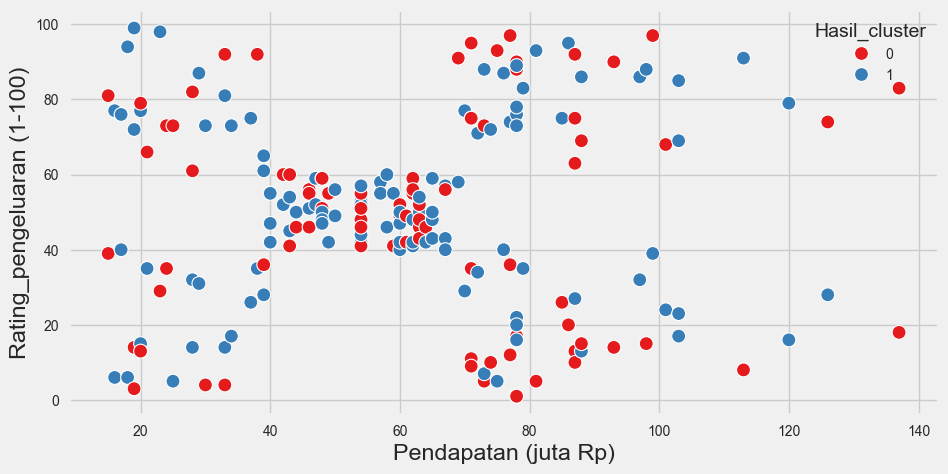

In [17]:
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'Pendapatan (juta Rp)', y = 'Rating_pengeluaran (1-100)',
                hue = 'Hasil_cluster', data = data, palette = 'Set1', s = 100);

**MATRIKS EVALUASI**

**1. Silhouette**

In [18]:
Evaluasi_KMeans = silhouette_score(X_scaled, y_pred1)
print("Silhouette score: ", Evaluasi_KMeans)

Silhouette score:  0.5194624832665107


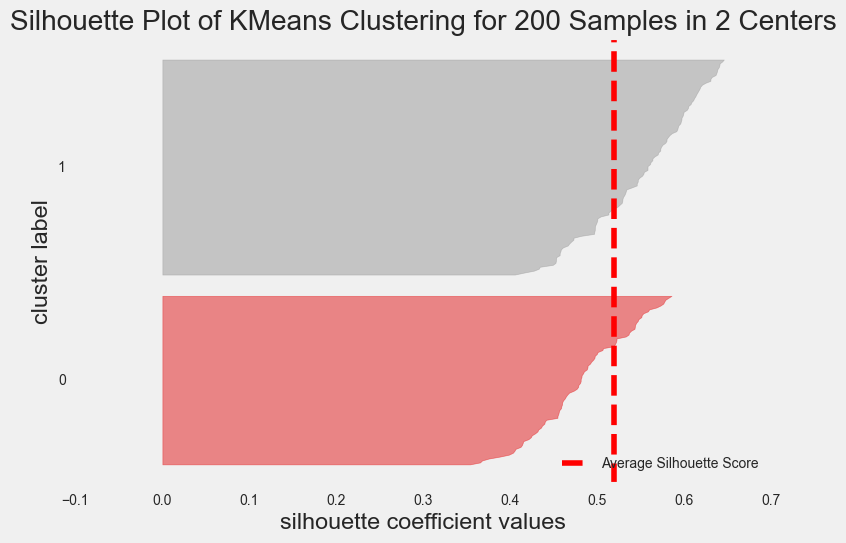

In [19]:
silhouette_viz = SilhouetteVisualizer(model1) #untuk algoritma K-MEANS
silhouette_viz.fit(X_scaled)
plt.grid(False)
silhouette_viz.show()
plt.show()

In [20]:
Evaluasi_DBScan = silhouette_score(X_scaled, y_pred1)
print("Silhouette score: ", Evaluasi_DBScan)

Silhouette score:  0.5194624832665107


In [21]:
#mendekati 0 semakin bagus jarak cluster

**2.Davies Bouldin Index (DBI)**

In [22]:
#Menghitung davies bouldin indeks algoritma k-means
doi_score1 = davies_bouldin_score(X_scaled, y_pred1)
print("Davies Bouldin Index (DBBI):", doi_score1)

Davies Bouldin Index (DBBI): 0.8172534497318451


In [23]:
#Menghitung davies bouldin indeks algoritma DB-Scan
doi_score2 = davies_bouldin_score(X_scaled, y_pred2)
print("Davies Bouldin Index (DBBI):", doi_score2)

Davies Bouldin Index (DBBI): 0.8172534497318451


In [24]:
#mendekati 0 semakin bagus hasil kekompakan cluster

hal yang bisa dilakukan untuk improve model performance? **Hyperparameter tuning**
- grid search
- random search
- bayesian search
- pso
- GWO